In [45]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn import linear_model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/Users/chenaya/Documents/ds project/Housing Price/house-prices-advanced-regression-techniques/train.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# Data Prepropcessing: class, catagorical, year

In [4]:
class_list = ['MSSubClass',
            'MSZoning',
            'Street',
            'Alley',
            'LotShape',
            'LandContour',
            'Utilities',
            'LotConfig',
            'LandSlope',
            'Neighborhood',
            'Condition1',
            'Condition2',
            'BldgType',
            'HouseStyle',
            'RoofStyle',
            'RoofMatl',
            'Exterior1st',
            'Exterior2nd',
            'MasVnrType',
            'ExterQual',
            'ExterCond',
            'Foundation',
            'Heating',
            'HeatingQC',
            'CentralAir',
            'Electrical', 
            'GarageType',
            'GarageFinish',
            'PavedDrive', 
             'MiscFeature',
            'SaleType',
            'SaleCondition']
year_list = ['YearBuilt',
            'YearRemodAdd',
            'GarageYrBlt',
            'YrSold']
cat_list = ['BsmtQual',
            'BsmtCond',
            'BsmtExposure',
            'BsmtFinType1',
            'BsmtFinType2',
            'ExterQual',
            'ExterCond',
            'HeatingQC',
            'KitchenQual',
            'Functional',
            'FireplaceQu',
            'GarageQual',
            'GarageCond',
            'PoolQC',
            'Fence']
num_list = [i for i in data.columns.tolist() if i not in class_list and i not in year_list and i not in cat_list]

In [5]:
data[cat_list]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,ExterQual,ExterCond,HeatingQC,KitchenQual,Functional,FireplaceQu,GarageQual,GarageCond,PoolQC,Fence
0,Gd,TA,No,GLQ,Unf,Gd,TA,Ex,Gd,Typ,NaN,TA,TA,NaN,NaN
1,Gd,TA,Gd,ALQ,Unf,TA,TA,Ex,TA,Typ,TA,TA,TA,NaN,NaN
2,Gd,TA,Mn,GLQ,Unf,Gd,TA,Ex,Gd,Typ,TA,TA,TA,NaN,NaN
3,TA,Gd,No,ALQ,Unf,TA,TA,Gd,Gd,Typ,Gd,TA,TA,NaN,NaN
4,Gd,TA,Av,GLQ,Unf,Gd,TA,Ex,Gd,Typ,TA,TA,TA,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,Gd,TA,No,Unf,Unf,TA,TA,Ex,TA,Typ,TA,TA,TA,NaN,NaN
1456,Gd,TA,No,ALQ,Rec,TA,TA,TA,TA,Min1,TA,TA,TA,NaN,MnPrv
1457,TA,Gd,No,GLQ,Unf,Ex,Gd,Ex,Gd,Typ,Gd,TA,TA,NaN,GdPrv
1458,TA,TA,Mn,GLQ,Rec,TA,TA,Gd,Gd,Typ,NaN,TA,TA,NaN,NaN


In [6]:
data[class_list]

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,Heating,HeatingQC,CentralAir,Electrical,GarageType,GarageFinish,PavedDrive,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,GasA,Ex,Y,SBrkr,Attchd,RFn,Y,NaN,WD,Normal
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,GasA,Ex,Y,SBrkr,Attchd,RFn,Y,NaN,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,GasA,Ex,Y,SBrkr,Attchd,RFn,Y,NaN,WD,Normal
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,GasA,Gd,Y,SBrkr,Detchd,Unf,Y,NaN,WD,Abnorml
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,GasA,Ex,Y,SBrkr,Attchd,RFn,Y,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,GasA,Ex,Y,SBrkr,Attchd,RFn,Y,NaN,WD,Normal
1456,20,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,GasA,TA,Y,SBrkr,Attchd,Unf,Y,NaN,WD,Normal
1457,70,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,GasA,Ex,Y,SBrkr,Attchd,RFn,Y,Shed,WD,Normal
1458,20,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,GasA,Gd,Y,FuseA,Attchd,Unf,Y,NaN,WD,Normal


In [7]:
data[num_list]

,Id,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice
0,1,65.0,8450,7,5,196.0,706,0,150,856,...,548,0,61,0,0,0,0,0,2,208500
1,2,80.0,9600,6,8,0.0,978,0,284,1262,...,460,298,0,0,0,0,0,0,5,181500
2,3,68.0,11250,7,5,162.0,486,0,434,920,...,608,0,42,0,0,0,0,0,9,223500
3,4,60.0,9550,7,5,0.0,216,0,540,756,...,642,0,35,272,0,0,0,0,2,140000
4,5,84.0,14260,8,5,350.0,655,0,490,1145,...,836,192,84,0,0,0,0,0,12,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,62.0,7917,6,5,0.0,0,0,953,953,...,460,0,40,0,0,0,0,0,8,175000
1456,1457,85.0,13175,6,6,119.0,790,163,589,1542,...,500,349,0,0,0,0,0,0,2,210000
1457,1458,66.0,9042,7,9,0.0,275,0,877,1152,...,252,0,60,0,0,0,0,2500,5,266500
1458,1459,68.0,9717,5,6,0.0,49,1029,0,1078,...,240,366,0,112,0,0,0,0,4,142125


In [8]:
# handle classification columns
dummy_df = pd.get_dummies(data[class_list].astype(str),drop_first=True, dtype = float)
dummy_df

,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1456,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1458,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [9]:
# handle year type of columns
for i in year_list:
    data[i+'_encode'] = datetime.date.today().year - data[i]

In [10]:
#manually code categorical columns PartI:
for i in ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual','FireplaceQu','GarageQual','GarageCond']:
    data.loc[data[i] == 'Ex', i+'_encode'] = 5
    data.loc[data[i] == 'Gd', i+'_encode'] = 4
    data.loc[data[i] == 'TA', i+'_encode'] = 3
    data.loc[data[i] == 'Fa', i+'_encode'] = 2
    data.loc[data[i] == 'Po', i+'_encode'] = 1
    data.loc[data[i] == 'NA', i+'_encode'] = 0
    data.loc[data[i].isnull(), i+'_encode'] = 0
    
data[[i for i in data.columns if '_encode' in i]]   

,YearBuilt_encode,YearRemodAdd_encode,GarageYrBlt_encode,YrSold_encode,ExterQual_encode,ExterCond_encode,BsmtQual_encode,BsmtCond_encode,HeatingQC_encode,KitchenQual_encode,FireplaceQu_encode,GarageQual_encode,GarageCond_encode
0,21,21,21.0,16,4.0,3.0,4.0,3.0,5.0,4.0,0.0,3.0,3.0
1,48,48,48.0,17,3.0,3.0,4.0,3.0,5.0,3.0,3.0,3.0,3.0
2,23,22,23.0,16,4.0,3.0,4.0,3.0,5.0,4.0,3.0,3.0,3.0
3,109,54,26.0,18,3.0,3.0,3.0,4.0,4.0,4.0,4.0,3.0,3.0
4,24,24,24.0,16,4.0,3.0,4.0,3.0,5.0,4.0,3.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,25,24,25.0,17,3.0,3.0,4.0,3.0,5.0,3.0,3.0,3.0,3.0
1456,46,36,46.0,14,3.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0
1457,83,18,83.0,14,5.0,4.0,3.0,4.0,5.0,4.0,4.0,3.0,3.0
1458,74,28,74.0,14,3.0,3.0,3.0,3.0,4.0,4.0,0.0,3.0,3.0


In [11]:
#manually code categorical columns PartII:

data[[i for i in cat_list if i not in ['ExterQual','ExterCond','BsmtQual','BsmtCond','HeatingQC','KitchenQual',
                                       'FireplaceQu','GarageQual','GarageCond']]]
data.loc[data.BsmtExposure == 'Gd','BsmtExposure_encode'] = 4
data.loc[data.BsmtExposure == 'Av','BsmtExposure_encode'] = 3
data.loc[data.BsmtExposure == 'Mn','BsmtExposure_encode'] = 2
data.loc[data.BsmtExposure == 'No','BsmtExposure_encode'] = 1
data.loc[data.BsmtExposure == 'NA','BsmtExposure_encode'] = 0

data.loc[data.BsmtFinType1 == 'GLQ','BsmtFinType1_encode'] = 6
data.loc[data.BsmtFinType1 == 'ALQ','BsmtFinType1_encode'] = 5
data.loc[data.BsmtFinType1 == 'BLQ','BsmtFinType1_encode'] = 4
data.loc[data.BsmtFinType1 == 'Rec','BsmtFinType1_encode'] = 3
data.loc[data.BsmtFinType1 == 'LwQ','BsmtFinType1_encode'] = 2
data.loc[data.BsmtFinType1 == 'Unf','BsmtFinType1_encode'] = 1
data.loc[data.BsmtFinType1 == 'NA','BsmtFinType1_encode'] = 0

data.loc[data.BsmtFinType2 == 'GLQ','BsmtFinType2_encode'] = 6
data.loc[data.BsmtFinType2 == 'ALQ','BsmtFinType2_encode'] = 5
data.loc[data.BsmtFinType2 == 'BLQ','BsmtFinType2_encode'] = 4
data.loc[data.BsmtFinType2 == 'Rec','BsmtFinType2_encode'] = 3
data.loc[data.BsmtFinType2 == 'LwQ','BsmtFinType2_encode'] = 2
data.loc[data.BsmtFinType2 == 'Unf','BsmtFinType2_encode'] = 1
data.loc[data.BsmtFinType2 == 'NA','BsmtFinType2_encode'] = 0

data.loc[data.Functional == 'Typ','Functional_encode'] = 8
data.loc[data.Functional == 'Min1','Functional_encode'] = 7
data.loc[data.Functional == 'Min2','Functional_encode'] = 6
data.loc[data.Functional == 'Mod','Functional_encode'] = 5
data.loc[data.Functional == 'Maj1','Functional_encode'] = 4
data.loc[data.Functional == 'Maj2','Functional_encode'] = 3
data.loc[data.Functional == 'Sev','Functional_encode'] = 2
data.loc[data.Functional == 'Sal','Functional_encode'] = 1

data.loc[data.PoolQC == 'Ex','PoolQC_encode'] = 4
data.loc[data.PoolQC == 'Gd','PoolQC_encode'] = 3
data.loc[data.PoolQC == 'TA','PoolQC_encode'] = 2
data.loc[data.PoolQC == 'Fa','PoolQC_encode'] = 1
data.loc[data.PoolQC == 'NA','PoolQC_encode'] = 0

data.loc[data.Fence == 'Ex','Fence_encode'] = 4
data.loc[data.Fence == 'Gd','Fence_encode'] = 3
data.loc[data.Fence == 'TA','Fence_encode'] = 2
data.loc[data.Fence == 'Fa','Fence_encode'] = 1
data.loc[data.Fence == 'NA','Fence_encode'] = 0

In [13]:
df_prep1 = pd.concat([dummy_df, data[[i for i in data.columns if '_encode' in i]], data[num_list]], axis = 1)
df_prep1.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 235 columns):
 #    Column                 Dtype  
---   ------                 -----  
 0    MSSubClass_160         float64
 1    MSSubClass_180         float64
 2    MSSubClass_190         float64
 3    MSSubClass_20          float64
 4    MSSubClass_30          float64
 5    MSSubClass_40          float64
 6    MSSubClass_45          float64
 7    MSSubClass_50          float64
 8    MSSubClass_60          float64
 9    MSSubClass_70          float64
 10   MSSubClass_75          float64
 11   MSSubClass_80          float64
 12   MSSubClass_85          float64
 13   MSSubClass_90          float64
 14   MSZoning_FV            float64
 15   MSZoning_RH            float64
 16   MSZoning_RL            float64
 17   MSZoning_RM            float64
 18   Street_Pave            float64
 19   Alley_Pave             float64
 20   Alley_nan              float64
 21   LotShape_IR2           float64
 22 

# Dealing with Missing Data

In [14]:
df_prep2 = df_prep1.drop(columns = ['SalePrice'], axis = 1)
df_miss = pd.DataFrame({'column': df_prep2.columns,'missing_cnt': df_prep2.isnull().sum().tolist()})
df_miss[df_miss.missing_cnt > 0]

,column,missing_cnt
185,GarageYrBlt_encode,81
196,BsmtExposure_encode,38
197,BsmtFinType1_encode,37
198,BsmtFinType2_encode,38
200,PoolQC_encode,1453
201,Fence_encode,1460
203,LotFrontage,259
207,MasVnrArea,8


In [17]:
#remove >50% missing
remove_miss = df_miss.loc[df_miss.missing_cnt > len(df_prep2)/2,'column'].tolist() 
impute_miss = [i for i in df_miss.loc[df_miss.missing_cnt > 0,'column'] if i not in remove_miss]
#impute the rest with mode
df_prep3 = df_prep2.drop(columns = remove_miss, axis = 1)
for i in impute_miss:
    df_prep3[i].fillna(df_prep3[i].mode()[0], inplace = True)

/var/folders/sh/qh124g394vngwcx2ftny29900000gr/T/ipykernel_14928/680853541.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_prep3[i].fillna(df_prep3[i].mode()[0], inplace = True)


# Dealing with Multicolinearity

In [18]:
# VIF dataframe 
vif_data = pd.DataFrame() 
vif_data['feature'] = df_prep3.columns 
vif_data['VIF'] = [variance_inflation_factor(df_prep3.values, i) 
                   for i in range(len(df_prep3.columns))] 

/Users/chenaya/opt/anaconda3/lib/python3.9/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [19]:
#remove features with >10 VIF
df_prep4 = df_prep3.drop(columns = vif_data.loc[vif_data.VIF>10,'feature'].tolist(), axis = 1)

In [20]:
df_prep4

,MSSubClass_180,MSSubClass_40,MSZoning_RH,Street_Pave,Alley_Pave,Alley_nan,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MoSold
0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0,2,548,0,61,0,0,0,0,2
1,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1,2,460,298,0,0,0,0,0,5
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,2,608,0,42,0,0,0,0,9
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,3,642,0,35,272,0,0,0,2
4,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,3,836,192,84,0,0,0,0,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1,2,460,0,40,0,0,0,0,8
1456,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2,2,500,349,0,0,0,0,0,2
1457,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,2,1,252,0,60,0,0,0,0,5
1458,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0,1,240,366,0,112,0,0,0,4


# Linear regression with LASSO 

In [21]:
y = data['SalePrice']
X = df_prep4

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [22]:
lasso_model = linear_model.Lasso(alpha = 182).fit( X_train, y_train)
scores = cross_validate(lasso_model, X_train, y_train, cv=10, scoring = ('r2','neg_mean_squared_error'))
#scores.mean() 
scores#['neg_mean_sqaured_error']

{'fit_time': array([0.00834012, 0.00540996, 0.00537109, 0.0056982 , 0.00563598,
        0.00506234, 0.00528097, 0.00554585, 0.00545406, 0.00531888]),
 'score_time': array([0.00192618, 0.00144601, 0.00229216, 0.00179482, 0.00156307,
        0.00144792, 0.00144124, 0.00140715, 0.00141096, 0.00140524]),
 'test_r2': array([0.69692184, 0.84874021, 0.76114236, 0.41878229, 0.81337568,
        0.8534063 , 0.84217824, 0.84957277, 0.83185009, 0.88678848]),
 'test_neg_mean_squared_error': array([-2.62586408e+09, -9.73745590e+08, -1.15378118e+09, -2.84188327e+09,
        -1.63447357e+09, -8.47246453e+08, -8.27412259e+08, -8.32932122e+08,
        -6.91499138e+08, -6.89152839e+08])}

In [180]:
coef = pd.Series(lasso_model.coef_, index= X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
print("Coefficients:")
print(coef)

Lasso picked 65 variables and eliminated the other 74 variables
Coefficients:
MSSubClass_180    -0.000000
MSSubClass_40      0.000000
MSZoning_RH        0.000000
Street_Pave        0.000000
Alley_Pave         0.000000
                    ...    
EnclosedPorch     -0.817529
3SsnPorch         75.656898
ScreenPorch       56.864441
PoolArea          25.620949
MoSold           -49.969003
Length: 139, dtype: float64


In [29]:
# Set up the Lasso Regression model
lasso = linear_model.Lasso(max_iter = 10000)

# Set up the hyperparameter grid
param_grid = {'alpha': range(1000)}

# Set up the GridSearchCV object
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring = 'neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

/Users/chenaya/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/chenaya/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/chenaya/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.258e+11, tolerance: 4.973e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.line

GridSearchCV(cv=5, estimator=Lasso(max_iter=10000),
             param_grid={'alpha': range(0, 1000)},
             scoring='neg_mean_squared_error')

In [37]:
print("Best alpha value: ", grid_search.best_params_['alpha'])
y_pred = grid_search.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)
r2 = r2_score(y_test, y_pred)
print("r2 score: ", r2)
coef = pd.Series(grid_search.best_estimator_.coef_, index= X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
print("Coefficients:")
print(coef)

Best alpha value:  181
Mean squared error:  1081738009.9041538
r2 score:  0.8455831139180187
Lasso picked 65 variables and eliminated the other 74 variables
Coefficients:
MSSubClass_180    -0.000000
MSSubClass_40      0.000000
MSZoning_RH        0.000000
Street_Pave        0.000000
Alley_Pave         0.000000
                    ...    
EnclosedPorch     -0.797143
3SsnPorch         75.667078
ScreenPorch       56.805033
PoolArea          25.589035
MoSold           -50.173652
Length: 139, dtype: float64


# Linear Regression with Ridge

In [38]:
# Set up the ridge Regression model
ridge = linear_model.Ridge(max_iter = 10000)

# Set up the hyperparameter grid
param_grid = {'alpha': range(1000)}

# Set up the GridSearchCV object
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring = 'neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search_ridge.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(max_iter=10000),
             param_grid={'alpha': range(0, 1000)},
             scoring='neg_mean_squared_error')

In [39]:
print("Best alpha value: ", grid_search_ridge.best_params_['alpha'])
y_pred = grid_search_ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)
r2 = r2_score(y_test, y_pred)
print("r2 score: ", r2)
coef = pd.Series(grid_search_ridge.best_estimator_.coef_, index= X_train.columns)
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")
print("Coefficients:")
print(coef)

Best alpha value:  9
Mean squared error:  1092697819.3460608
r2 score:  0.8440186134284582
Lasso picked 135 variables and eliminated the other 4 variables
Coefficients:
MSSubClass_180   -2649.955422
MSSubClass_40     5272.608535
MSZoning_RH        297.845745
Street_Pave       9320.642697
Alley_Pave        5524.260314
                     ...     
EnclosedPorch        8.903295
3SsnPorch           80.391960
ScreenPorch         50.981732
PoolArea            26.650631
MoSold             -62.185442
Length: 139, dtype: float64


# explore PCA to reduce dimension

In [43]:
# Fit PCA for different numbers of components
pca_variances = []
for n_components in range(1, len(X_train.columns) + 1):
    pca = PCA(n_components=n_components)
    pca.fit(X_train)
    pca_variances.append(sum(pca.explained_variance_ratio_))

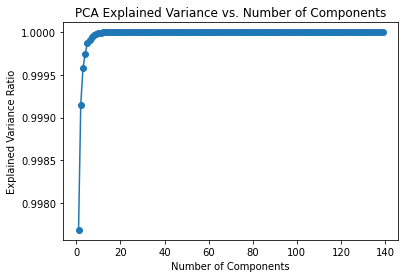

In [46]:
# Plot explained variance vs. number of components
plt.plot(range(1, len(X_train.columns) + 1), pca_variances, marker = 'o')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA Explained Variance vs. Number of Components')
plt.show()

In [47]:
pca = PCA(n_components = 19)
 
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [52]:
# LASSO with PCA dimension reduction

# Set up the Lasso Regression model
lasso = linear_model.Lasso(max_iter = 10000)

# Set up the hyperparameter grid
param_grid = {'alpha': range(1000)}

# Set up the GridSearchCV object
grid_search = GridSearchCV(estimator=lasso, param_grid=param_grid, cv=5, scoring = 'neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_pca, y_train)

print("Best alpha value: ", grid_search.best_params_['alpha'])
y_pred = grid_search.predict(X_test_pca)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)
r2 = r2_score(y_test, y_pred)
print("r2 score: ", r2)

/Users/chenaya/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
/Users/chenaya/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/chenaya/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.443e+11, tolerance: 4.973e+08 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.line

Best alpha value:  345
Mean squared error:  1781125287.4059162
r2 score:  0.7457463654924495


In [53]:
# Set up the ridge Regression model
ridge = linear_model.Ridge(max_iter = 10000)

# Set up the hyperparameter grid
param_grid = {'alpha': range(1000)}

# Set up the GridSearchCV object
grid_search_ridge = GridSearchCV(estimator=ridge, param_grid=param_grid, cv=5, scoring = 'neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search_ridge.fit(X_train_pca, y_train)

print("Best alpha value: ", grid_search_ridge.best_params_['alpha'])
y_pred = grid_search_ridge.predict(X_test_pca)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)
r2 = r2_score(y_test, y_pred)
print("r2 score: ", r2)


Best alpha value:  1
Mean squared error:  1781114359.5927474
r2 score:  0.745747925425507
